# TensorFlow neural net

In this workbook we build a neural network to predict survival. The two common frameworks used for neural networks (as of 2020) are TensorFlow and PyTorch. Both are excellent frameworks. TensorFlow frequently requires fewer lines of code, but PyTorch is more natively Python in its syntax. Here we use TensorFlow and keras' which is integrated into TensorFlow and makes it simpler and faster to build TensorFlow models.

## Installing TensorFlow

To install TensorFlow as a new environment in Anaconda type the following from a terminal (if you have already set up o the 'Titanic' environment you do not need to do this - use the Titanic environment. Also if you are using Colab then you need not do anything as Colab also has everything you need already built in).

`conda create -n tensorflow tensorflow && conda install -n tensorflow scikit-learn pandas matplotlib`

Or PIP install with `pip install tensorflow`

Then from Anaconda Navigator, select the Titanic or TensorFlow environment.

## The neural network unit - a neuron or perceptron

The building block of a neural network is a neuron, which is essentially the same as the 'perceptron' described by Frank Rosenblatt in 1958.

The neuron, or perceptron, takes inputs *X* and weights *W* (each individual input has a weight; a bias weight is also introduced by creating a dummy input with value 1). The neuron sums the *input x weight* and passes the output to an activation function. The simplest activation function is a step function, whereby if the output is >0 the output of the activation function is 1, otherwise the output is 0.

![](./images/perceptron.jpeg)

## Neural networks

Having understood a neuron - which calculates the weighted sum of its inputs and passes it through an activation function, neural networks are easy(ish)!

They are 'just' a network of such neurons, where the output of one becomes one of the inputs to the neurons in the next layer.

This allows any complexity of function to be mimicked by a neural network (so long as the network includes a non-linear activation function, like ReLU - see below).

Note the output layer may be composed of a single neuron, to predict a single value or single probability, or may be multiple neurons, to predict multiple values or multiple probabilities.

![](./images/net_1.png)


## Activation functions

Each neuron calculates the weighted sum of its inputs and passes that sum to an activation function. The two simplest functions are:

* *Linear*: The weighted output is passed forward with no change.

* *Step*: The output of the activation function is 0 or 1 depending on whether a threshold is reached.

Other common activation functions are:

* *Sigmoid*: Scales output 0-1 using a logistic function. Note that our simple perceptron becomes a logistic regression model if we use a sigmoid activation function. The sigmoid function is often used to produce a probability output at the final layer.

* *tanh*: Scales output -1 to 1. Commonly used in older neural network models. Not commonly used now.

* *ReLU (rectifying linear unit)*: Simply converts all negative values to zero, and leaves positive values unchanged. This very simple method is very common in deep neural networks, and is sufficient to allow networks to model non-linear functions.

* *Leaky ReLU* and *Exponential Linear Unit (ELU)*: Common modifications to ReLU that do not have such a hard constrain on negative inputs. Try them out as replacements to ReLU.

* *Maxout*: A generalised activation function that can model a complex non-linear activation function. 

* *SoftMax*: SoftMax is the final layer to use if you wish to normalise probability outputs from a network which has multiple class outputs.

![](./images/activation.png)

## Loss functions

Loss functions are critical to neural networks as they provide the measure by which the neural network is in error, allowing modification of the network to reduce error.

The most common loss functions are:

* *Mean Squared Error Loss*: Common loss function for regression (predicting values rather than class).

* *Cross Entropy Loss*: Common loss function for classification. *Binary Cross Entropy Loss* is used when the output is a binary classifier (like survive/die in the Titanic model).

## How do neural networks learn? Backpropagation and optimisation

*Backpropagation* is the process by which the final loss is distributed back through the network, allowing each weight to be updated in proportion to its contribution to the final error.

For more on backpropagation see: https://youtu.be/Ilg3gGewQ5U

For deeper maths on backpropagation see: https://youtu.be/tIeHLnjs5U8

*Optimisation* is the step-wise process by which weights are updated. The basic underlying method, *gradient descent*, is that weights are adjusted in the direction that improves fit, and that weights are adjust more when the gradient (how much the output changes with each unit change to the weight) is higher.

Common optimisers used are:

* *Stochastic gradient descent*: Updates gradients based on single samples. Can be inefficient, so can be modified to use gradients based on a small batch (e.g. 8-64) of samples. *Momentum* may also be added to avoid becoming trapped in local minima.

* *RMSprop*: A 'classic' benchmark optimiser. Adjusts steps based on a weighted average of all weight gradients.

* *Adam*: The most common optimiser used today. Has complex adaptive momentum for speeding up learning.

For more on optimisers see: https://youtu.be/mdKjMPmcWjY

For a short video on momentum see: https://youtu.be/6iwvtzXZ4Mo

## Training a neural network - the practicalities

The training process of a neural network consists of three general phases which are repeated across all the data. All of the data is passed through the network multiple times (the number of iterations, which may be as few as 3-5 or may be 1000+). The three phases are:

1. Pass training X data to the network and predict y

1. Calculate the 'loss' (error) between the predicted and observed (actual) values of y

1. Backpropagate the loss and update the weights (the job of the optimiser).

The learning is repeated until maximum accuracy is achieved (but keep an eye on accuracy of test data as well as training data as the network may develop significant over-fitting to training data unless steps are taken to offset the potential for over-fitting, such as use of 'drop-out' layers described below).

## Architectures

The most common fully connected architecture design is to have the same number of neurons in each layer, and adjust that number and the number of layers. This makes exploring the size of the neural net relatively easy (if sometimes slow). 

As a rough guide - the size of the neural net should be increased until it over-fits data (increasing accuracy of training data with reducing accuracy of test data), and then use a form of *regularisation* to reduce the over-fitting (we will go through this process below).

Some common architecture designs, which may be mixed in a single larger network, are:

* *Fully connected*: The output of each neuron goes to all neurons in the next layer.

* *Convolutional*: Common in image analysis. Small 'mini-nets' that look for patterns across the data - like a 'sliding window', but that can look at the whole picture at the same time. May also be used, for example, in time series to look for fingerprints of events anywhere in the time series.

* *Recurrent*: Introduce the concept of some (limited) form of memory into the network - at any one time a number of input steps are effecting the network output. Useful, for example, in sound or video analysis.

* *Transformers*: Sequence-to-sequence architecture. Convert sequences to sequences (e.g. translation).

* *Embedding*: Converts a categorical value to a vector of numbers, e.g. word-2-vec converts words to vectors such that similar meaning words are positioned close together.

* *Encoding*: Reduce many input features to fewer. This 'compresses' the data. De-coding layers may convert back to the original data.

* *Generative*: Rather than regression, or classification, generative networks output some form of synthetic data (such as fake images; see https://www.thispersondoesnotexist.com/).


## Additional resources

Also see the excellent introductory video (20 minutes) from 3brown1blue: https://youtu.be/aircAruvnKk

## Let's go !!!!!!!!!!!!!

In [1]:
# Turn warnings off to keep notebook tidy
import warnings
warnings.filterwarnings("ignore")

## Load modules

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# sklearn for pre-processing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

# TensorFlow sequential model
from tensorflow import keras
from tensorflow.keras import backend as K
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Dropout
from tensorflow.keras.optimizers import Adam

2021-10-09 22:50:26.038965: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcudart.so.10.1


## Download data if not previously downloaded

In [3]:
download_required = True

if download_required:
    
    # Download processed data:
    address = 'https://raw.githubusercontent.com/MichaelAllen1966/' + \
                '1804_python_healthcare/master/titanic/data/processed_data.csv'
    
    data = pd.read_csv(address)

    # Create a data subfolder if one does not already exist
    import os
    data_directory ='./data/'
    if not os.path.exists(data_directory):
        os.makedirs(data_directory)

    # Save data
    data.to_csv(data_directory + 'processed_data.csv', index=False)

## Define function to scale data

In neural networks it is common to to scale input data 0-1 rather than use standardisation (subtracting mean and dividing by standard deviation) of each feature).

In [4]:
def scale_data(X_train, X_test):
    """Scale data 0-1 based on min and max in training set"""
    
    # Initialise a new scaling object for normalising input data
    sc = MinMaxScaler()

    # Set up the scaler just on the training set
    sc.fit(X_train)

    # Apply the scaler to the training and test sets
    train_sc = sc.transform(X_train)
    test_sc = sc.transform(X_test)
    
    return train_sc, test_sc

## Load data

In [5]:
data = pd.read_csv('data/processed_data.csv')
# Make all data 'float' type
data = data.astype(float)
data.drop('PassengerId', inplace=True, axis=1)
X = data.drop('Survived',axis=1) # X = all 'data' except the 'survived' column
y = data['Survived'] # y = 'survived' column from 'data'
# Convert to NumPy as required for k-fold splits
X_np = X.values
y_np = y.values

# Set up neural net

Here we use the `sequential` method to set up a TensorFlow neural network. This simpler method assumes each layer occurs in sequence. Though simpler, it lacks some flexibility.

We will put construction of the neural net into a separate function.

The neural net is a relatively simple network. The inputs are connected to two hidden layers (of 240 and 50 nodes) before being connected to two output nodes corresponding to each class (died and survived). It also contains some useful additions (batch normalisation and dropout) as described below.

The layers of the network are:

1) An input layer (which does not need to be defined) 

2) A fully-connected (dense) layer.This is defined by the number of inputs (the number of input features) and the number of outputs. We will expand out feature data set up to 240 outputs. The output of the layer uses ReLU  (rectified linear unit) activation. ReLU activation is most common for the inner layers of a neural network. Negative input values are set to zero. Positive input values are left unchanged.

5) A second fully connected layer which reduces the network down to 50 nodes. This again uses ReLU activation and is followed by batch normalisation, and dropout layers.

7) A final fully connected linear layer of one nodes (more nodes could be used for more classes, in which case use `softmax` activation and `categorical_crossentropy` in the loss function).

The output of the net is the probability of surviving (usually a probability of >= 0.5 will be classes as 'survived').

In [6]:
def make_net(number_features, 
             hidden_layers=3, 
             hidden_layer_neurones=128, 
             dropout=0.0, 
             learning_rate=0.003):
    
    """Make TensorFlow neural net"""
    
    # Clear Tensorflow 
    K.clear_session()
    
    # Set up neural net
    net = Sequential()
    
    # Add hidden hidden_layers using a loop
    for i in range(hidden_layers):
        # Add fully connected layer with ReLu activation
        net.add(Dense(
            hidden_layer_neurones, 
            input_dim=number_features,
            activation='relu'))
        # Add droput layer
        net.add(Dropout(dropout))
    
    # Add final sigmoid activation output
    net.add(Dense(1, activation='sigmoid'))    
    
    # Compiling model
    opt = Adam(lr=learning_rate)
    
    net.compile(loss='binary_crossentropy', 
                optimizer=opt, 
                metrics=['accuracy'])
    
    return net

## Show summary of the model structure

Here we will create a model with 10 input features and show the structure of the model.

In [7]:
model = make_net(10)
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 128)               1408      
_________________________________________________________________
dropout (Dropout)            (None, 128)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 128)               16512     
_________________________________________________________________
dropout_1 (Dropout)          (None, 128)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 128)               16512     
_________________________________________________________________
dropout_2 (Dropout)          (None, 128)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 1

2021-10-09 22:50:27.151094: I tensorflow/compiler/jit/xla_cpu_device.cc:41] Not creating XLA devices, tf_xla_enable_xla_devices not set
2021-10-09 22:50:27.151843: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcuda.so.1
2021-10-09 22:50:27.214458: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:941] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2021-10-09 22:50:27.214753: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1720] Found device 0 with properties: 
pciBusID: 0000:01:00.0 name: NVIDIA GeForce GTX 1650 Ti computeCapability: 7.5
coreClock: 1.485GHz coreCount: 16 deviceMemorySize: 3.82GiB deviceMemoryBandwidth: 178.84GiB/s
2021-10-09 22:50:27.214784: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcudart.so.10.1
2021-10-09 22:50:27.216074: I tensorflow/stream_executor/platform

## Split and Scale data

For simplicity, here we will use a single train/test split rather than k-fold validation.

In [8]:
# Split data
X_train, X_test, y_train, y_test = train_test_split(
    X_np, y_np, test_size = 0.25, random_state=42)

# Scale X data
X_train_sc, X_test_sc = scale_data(X_train, X_test)

## Function to calculate accuracy

In [9]:
def calculate_accuracy(model, X_train_sc, X_test_sc, y_train, y_test):
    """Calculate and print accuracy of trainign and test data fits"""    
    
    ### Get accuracy of fit to training data
    probability = model.predict(X_train_sc)
    y_pred_train = probability >= 0.5
    y_pred_train = y_pred_train.flatten()
    accuracy_train = np.mean(y_pred_train == y_train)
    
    ### Get accuracy of fit to test data
    probability = model.predict(X_test_sc)
    y_pred_test = probability >= 0.5
    y_pred_test = y_pred_test.flatten()
    accuracy_test = np.mean(y_pred_test == y_test)

    # Show acuracy
    print (f'Training accuracy {accuracy_train:0.3f}')
    print (f'Test accuracy {accuracy_test:0.3f}')

In [10]:
def plot_training(history_dict):
    acc_values = history_dict['accuracy']
    val_acc_values = history_dict['val_accuracy']
    epochs = range(1, len(acc_values) + 1)

    plt.plot(epochs, acc_values, 'bo', label='Training acc')
    plt.plot(epochs, val_acc_values, 'b', label='Test accuracy')
    plt.title('Training and validation accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()

    plt.show()

## Run the model

In [11]:
# Define network
number_features = X_train_sc.shape[1]
model = make_net(number_features)

### Train model (and stote training info in history)
history = model.fit(X_train_sc,
                    y_train,
                    epochs=250,
                    batch_size=64,
                    validation_data=(X_test_sc, y_test),
                    verbose=0)

2021-10-09 22:50:27.793787: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:116] None of the MLIR optimization passes are enabled (registered 2)
2021-10-09 22:50:27.811018: I tensorflow/core/platform/profile_utils/cpu_utils.cc:112] CPU Frequency: 2599990000 Hz
2021-10-09 22:50:28.208764: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcublas.so.10


In [12]:
# Show acuracy
calculate_accuracy(model, X_train_sc, X_test_sc, y_train, y_test)

Training accuracy 0.921
Test accuracy 0.776


### Get training history

`history` is a dictionary containing data collected suring training. Let's take a look at the keys in this dictionary (these are the metrics monitored during training):

In [13]:
history_dict = history.history
history_dict.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

### Plot training history

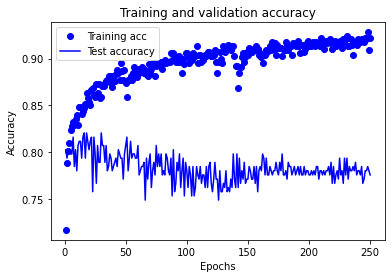

In [14]:
plot_training(history.history)

## Improving fit by avoiding or reducing-over fitting

### 1) Reduce complexity of model

In [15]:
# Define network
number_features = X_train_sc.shape[1]
model = make_net(number_features,
                hidden_layers=1,
                hidden_layer_neurones=32)

### Train model (and stote training info in history)
history = model.fit(X_train_sc,
                    y_train,
                    epochs=250,
                    batch_size=64,
                    validation_data=(X_test_sc, y_test),
                    verbose=0)

In [16]:
# Show acuracy
calculate_accuracy(model, X_train_sc, X_test_sc, y_train, y_test)

Training accuracy 0.877
Test accuracy 0.825


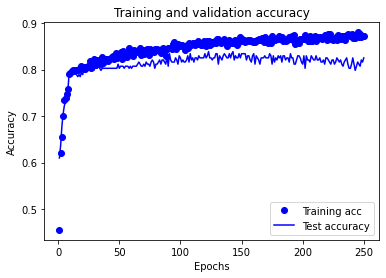

In [17]:
plot_training(history.history)

### 2) Reduce training time

In [18]:
# Define network
number_features = X_train_sc.shape[1]
model = make_net(number_features)
### Train model (and stote training info in history)
history = model.fit(X_train_sc,
                    y_train,
                    epochs=25,
                    batch_size=64,
                    validation_data=(X_test_sc, y_test),
                    verbose=0)

In [19]:
# Show acuracy
calculate_accuracy(model, X_train_sc, X_test_sc, y_train, y_test)

Training accuracy 0.880
Test accuracy 0.798


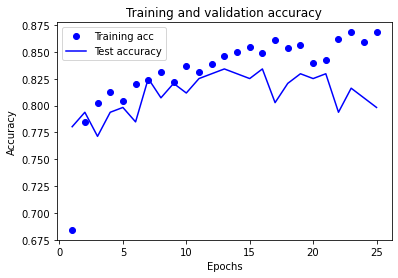

In [20]:
plot_training(history.history)

### 3) Add dropout

Using dropout, in each trainign epoch a random selection of weights are not used (the sleection changes from epoch to epoch). When predicting, after fitting, all weights are used.

Dropout values of 0.2 to 0.5 are common.

In [21]:
# Define network
number_features = X_train_sc.shape[1]
model = make_net(number_features,
                dropout=0.5)

### Train model (and stote training info in history)
history = model.fit(X_train_sc,
                    y_train,
                    epochs=250,
                    batch_size=64,
                    validation_data=(X_test_sc, y_test),
                    verbose=0)

In [22]:
# Show acuracy
calculate_accuracy(model, X_train_sc, X_test_sc, y_train, y_test)

Training accuracy 0.895
Test accuracy 0.803


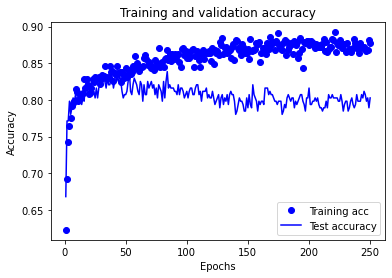

In [23]:
plot_training(history.history)

### 4) L1 and L2 regularisation

A regression model that uses L1 regularization technique is called Lasso Regression and model which uses L2 is called Ridge Regression.

Both reduce the weights associated with features in the network, and increase the weight of the bias so that all values are pulled closer to the average. L1 regularisation tends to pull fewer weights down, but reduces them to a greater degree, whereas L2 regularisation reduces all weights. 

L1 and L2 regularisation are commonly used in regression. They are now less commonly used in neural networks. Here we will just mention them rather than use them.

### 5) Combination of the above and with automatic early stopping

In [24]:
# Define save checkpoint callback (only save if new best validation results)
checkpoint_cb = keras.callbacks.ModelCheckpoint(
    'model_checkpoint.h5', save_best_only=True)

# Define early stopping callback
# Stop when no validation improvement for 25 epochs
# Restore weights to best validation accuracy
early_stopping_cb = keras.callbacks.EarlyStopping(
    patience=25, restore_best_weights=True)

# Define network
number_features = X_train_sc.shape[1]
model = make_net(
    number_features,
    hidden_layers=2,
    hidden_layer_neurones=64,
    dropout=0.3)

### Train model (and stote training info in history)
history = model.fit(X_train_sc,
                    y_train,
                    epochs=250,
                    batch_size=64,
                    validation_data=(X_test_sc, y_test),
                    verbose=0,
                    callbacks=[checkpoint_cb, early_stopping_cb])

In [25]:
# Show acuracy
calculate_accuracy(model, X_train_sc, X_test_sc, y_train, y_test)

Training accuracy 0.835
Test accuracy 0.803


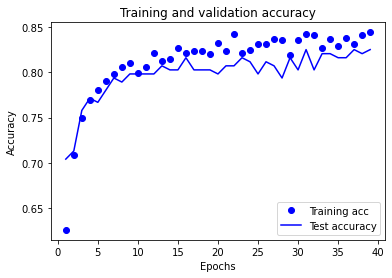

In [26]:
plot_training(history.history)

## Saving and reloading model

In [27]:
# Save model
model.save('titanic_tf_model.h5')

# Load and use saved model - we need to first set up a model
restored_model = keras.models.load_model('titanic_tf_model.h5')
 
# Predict classes as normal
predicted_proba = restored_model.predict(X_test_sc)

# Show examples of predicted probability
print(predicted_proba[0:5].flatten())

[0.10969185 0.13306403 0.12150172 0.8680827  0.75674796]


In [28]:
calculate_accuracy(restored_model, X_train_sc, X_test_sc, y_train, y_test)

Training accuracy 0.835
Test accuracy 0.803
